# <center><font color = lime>**<u>Change Detection Using Polarimetric SAR data</u>**

**AIM**:
Using *Polarimetric Synthetic Aperture* Radars to detect changes in an agricultural field.

**DATA**:
- Binary files containing real and complex numbers.
- Provided to me from a supervisor.

---
NOTES about data:
The data compared here has been acquired in March and April, 1998. The site is located at the *Research Centre Foulum of the Danish Institute of Agricultural Sciences*. The site contains a large number of agricultural fields with different crops, as well as several lakes, forests, areas with natural vegetation, grasslands, and urban areas.

For this project the following section is considered.

<img src = "Fields.jpg" width="400" height="200">

A description of the crops was provided as an excel file:

In [1]:
import pandas as pd

df = pd.read_excel('croptypes.xlsx', index_col=[0])
df.drop(index=df.index[0], axis=0, inplace=True)
df.head(10)

,Crop,Height April,BBCH April,Height May,BBCH May,Height June,BBCH June,Height July,BBCH July
Label,,,,,,,,,
1.0,Rye,NaN,23-24,61,49,110,60,92,86
2.0,Grass (Rajgræs),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,Winter wheat,NaN,20,48,37,74,59,71,85
4.0,Grass (Rajgræs),12,21,26,37,54,60,NaN,80
5.0,Winter wheat,14,29,42,39,78,58,90,81
6.0,Spring barley,NaN,NaN,14,28,54,49,63,63
7.0,Peas,NaN,NaN,12,14,42,54,69,71
8.0,Rye,21,21,51,49,98,65,99,80
9.0,Spring oats,NaN,NaN,22,29,66,43,99,69


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = yellow> ■ **<u>Polarimetric SAR</u>**

This data has been acquired by the *EMISAR* system, an airborne, experimental, fully polarimetric Synthetic Aperture Radar. A SAR system can collect remote sensing data in most weather and light conditions. A Polarimetric SAR exploits different responses to different polarizations of the radar signals.

Some key characteristics:

- Two frequencies: 5.3 GHz (C-Band), 1.2 GHz (L-Band). The data used for the project has been acquired in L-Band.
- Altitude: 12,500 m ca
- Spatial Resolution: 2 x 2 m (one look)
- Ground range swath: 12 km ca
- Incidence Angle: 35 - 60 degrees
- Radiometric calibration: better than ±0.5 dB
- Channel imbalance: less than ±0.5 dB in amplitude and ±5° in phase
- Cross-Polarisation contamination suppressed by more than 30 dB.

### <font color = yellow> ■ **<u>Data Acquisition</u>**

In practicle terms, the amplitude and phase of backscattered signals are measured in four combinations of linear transmitted and received polarizations : HH, HV, VH and VV. This data is used to build the so-called *complex scattering matrix*.

The development of different crops over time causes changes in the backscatter. The radar backscattering is sensitive to the dielectric properties of the vegetation and the soil, to the plant structure (i.e., the size, shape, and orientation distributions of the scatterers), to the surface roughness, and to the canopy structure (e.g., row direction and spacing and cover fraction).

Polarimetric data is affected by *speckle noise*, therefore data is filtered when it's aquired to reduce noise. Without going too deep into the details, the result is labelled as multi-look data for which a more proper representation is the *covariance matrix*, in which the average properties of a group of resolution cells can be
expressed in a single matrix. The average covariance matrix is

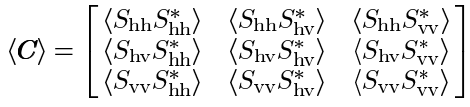

<font color = orange> **<u>NOTE:</u>** This matrix is *Hermitian*: elements above the main diagonal are the complex conjugates of the element below it. 
    
All acquisitions were co-registered by identifying ground control points in the images and using an interferometric DEM acquired by the EMISAR system. Before resampling, the original one-look scattering matrix data were transformed to covariance matrix data, and these data were averaged to reduce the speckle by a cosine-squared weighted 9 by 9 filter. The new pixel spacing in the images is 5 m by 5 m, and the effective spatial resolution is approximately 8 m by 8 m at mid-range. After the averaging the equivalent number of looks is estimated to be 9-11 from homogenous areas in the images. This corresponds to a standard deviation for the backscatter coefficient of approximately 1.1 – 1.8 dB.

![separator2](https://i.imgur.com/4gX5WFr.png)

### <font color = lime> **<u>Data Processing - Theory</u>**

The dataset can be used to build images.

The numbers read from the binary files are related to different pixels.

For each pixel a covariance matrix is constructed.

The aim of this project is to use these covariance matrices - so the full polarimetric data and not just part - to detect changes in 2 different datasets.

---
The covariance Matrix follows a *Wishart Distribution*.

For 2 Hermitian, positive, definite, Wishart-distributed matrices **X** and **Y**, in testing the null hypothesis that the 2 matrices are equal against the hypothesis that they are different, the *Likelihood-Ratio Test Statistics* is:

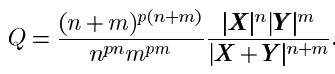

which in the case n = m that is typically the case for change detection, leads to

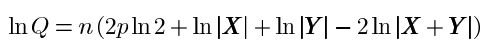

It can be demonstrated that:

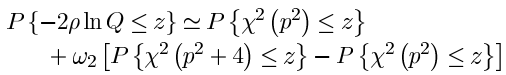

(z is the cumulative distribution function of the distribution -2ρlnQ).

With

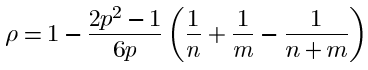

and 

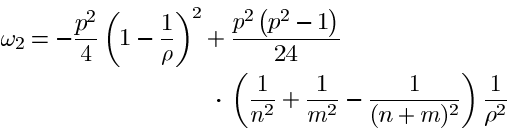

Thus, -2ρlnQ should fit a *χ2 distribution*.

When the probability mentioned before is high, the null hypothesis is rejected.

In literature, the 5% and the 1% significance levels and the regions with probabilities lower than these levels are the regions where the null hypothesis is rejected for the 2 points in time (when major changes occurred).



The significance level is the probability of rejecting the null hypothesis **when it is true**. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Lower significance levels indicate that you require stronger evidence before you will reject the null hypothesis.

![separator2](https://i.imgur.com/4gX5WFr.png)

### <font color = lime> **<u>Data Processing - In practice</u>**

In practicle terms, the aim of the project is to determine the distribution -lnρQ for each resolution cell (pixel) and use that to find regions with changes.

This entails:
- Reading data correctly from binary files into matrices that can be displayed as images in order to obtain radar signals for each pixels for various combinations of polarization for transmission and detection.
- Building covariance matrices for each pixel (**X** and **Y**).
- Finding the equivalent number of looks (n)
- Selecting a threshold from the distribution -2ρlnQ in a region with no changes and use this threshold to create a binary image (change/no change)